In [1]:
import pandas as pd

# Read data from CSV file
training_data_path = "pattern mining training dataset.csv"
testing_data_path = "pattern mining testing dataset.csv"

# Read training and testing files
training_df = pd.read_csv(training_data_path)
testing_df = pd.read_csv(testing_data_path)

# Columns to remove
columns_to_remove = [
    "originalTitle", "startYear", "awardWins", "totalVideos",
    "criticReviewsTotal", "awardNominationsExcludeWins", "canHaveEpisodes",
    "isAdult", "genresEncoded", "countryEncoded", "numRegions", "userReviewsTotal"
]

# Remove columns from the dataset
training_df = training_df.drop(columns=columns_to_remove, errors='ignore')
testing_df = testing_df.drop(columns=columns_to_remove, errors='ignore')

# Display information after removing column
print("Training dataset after removing columns:")
print(training_df.head())

print("\nTesting dataset after removing columns:")
print(testing_df.head())

# Chuyển đổi dữ liệu thành danh sách giao dịch (transactions)
#transactions_training = training_df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()
#transactions_testing = testing_df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()



Training dataset after removing columns:
   runtimeMinutes  numVotes  totalImages  totalCredits  ratingCount  \
0        0.640648  0.529847     0.116636      0.453158     0.530092   
1        0.773310  0.075451     0.116636      0.101618     0.075447   
2        0.458838  0.203752     0.116636      0.471899     0.203739   
3        0.671966  0.106766     0.527612      0.592727     0.106760   
4        0.588377  0.099741     0.116636      0.000000     0.099735   

   averageRating  titleType  
0            7.5  tvEpisode  
1            5.5  videoGame  
2            5.5      movie  
3            5.5   tvSeries  
4            8.5      video  

Testing dataset after removing columns:
   runtimeMinutes  numVotes  totalImages  totalCredits  ratingCount  \
0        0.478244  0.115846     0.359146      0.393470     0.115843   
1        0.767885  0.464002     0.414147      0.588022     0.463990   
2        0.808100  0.071591     0.189744      0.308123     0.071589   
3        0.607209  0.081868

In [3]:
# Phân nhóm giá trị theo tứ phân vị cho các cột cụ thể cho training data
columns_to_bin = [
    "runtimeMinutes", "numVotes", "totalImages", 
    "totalCredits", "ratingCount"
]

# Sử dụng tứ phân vị để phân nhóm, xử lý lỗi cạnh trùng lặp bằng duplicates="drop"
for column in columns_to_bin:
    try:
        training_df[f"{column}Bin"] = pd.qcut(training_df[column], 4, duplicates="drop")
    except ValueError as e:
        print(f"Cannot bin column '{column}' due to: {e}")

# Phân nhóm giá trị cho cột averageRating theo bins chỉ định
bins = [0.5, 3.5, 6.5, 10]
labels = ['Low', 'Medium', 'High']
training_df["averageRatingBin"] = pd.cut(training_df["averageRating"], bins=bins, labels=labels, include_lowest=True)

# Xóa các cột gốc sau khi phân nhóm
columns_to_drop = columns_to_bin + ["averageRating"]
training_df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Kiểm tra kết quả
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15938 entries, 0 to 15937
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   titleType          15938 non-null  object  
 1   runtimeMinutesBin  15938 non-null  category
 2   numVotesBin        15938 non-null  category
 3   totalImagesBin     15938 non-null  category
 4   totalCreditsBin    15938 non-null  category
 5   ratingCountBin     15938 non-null  category
 6   averageRatingBin   15938 non-null  category
dtypes: category(6), object(1)
memory usage: 219.2+ KB


In [5]:
training_df.head()

,titleType,runtimeMinutesBin,numVotesBin,totalImagesBin,totalCreditsBin,ratingCountBin,averageRatingBin
0,tvEpisode,"(0.545, 0.675]","(0.341, 1.0]","(-0.001, 0.117]","(0.415, 0.521]","(0.34, 1.0]",High
1,videoGame,"(0.747, 1.0]","(-0.001, 0.107]","(-0.001, 0.117]","(-0.001, 0.415]","(-0.001, 0.107]",Medium
2,movie,"(-0.001, 0.545]","(0.195, 0.341]","(-0.001, 0.117]","(0.415, 0.521]","(0.195, 0.34]",Medium
3,tvSeries,"(0.545, 0.675]","(-0.001, 0.107]","(0.302, 1.0]","(0.521, 0.61]","(-0.001, 0.107]",Medium
4,video,"(0.545, 0.675]","(-0.001, 0.107]","(-0.001, 0.117]","(-0.001, 0.415]","(-0.001, 0.107]",High


In [7]:
# Phân nhóm giá trị theo tứ phân vị cho các cột cụ thể cho testing data
columns_to_bin = [
    "runtimeMinutes", "numVotes", "totalImages", 
    "totalCredits", "ratingCount"
]

# Sử dụng tứ phân vị để phân nhóm, xử lý lỗi cạnh trùng lặp bằng duplicates="drop"
for column in columns_to_bin:
    try:
        testing_df[f"{column}Bin"] = pd.qcut(testing_df[column], 4, duplicates="drop")
    except ValueError as e:
        print(f"Cannot bin column '{column}' due to: {e}")

# Phân nhóm giá trị cho cột averageRating theo bins chỉ định
bins = [0.5, 3.5, 6.5, 10]
labels = ['Low', 'Medium', 'High']
testing_df["averageRatingBin"] = pd.cut(testing_df["averageRating"], bins=bins, labels=labels, include_lowest=True)

# Xóa các cột gốc sau khi phân nhóm
columns_to_drop = columns_to_bin + ["averageRating"]
testing_df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Kiểm tra kết quả
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5313 entries, 0 to 5312
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   titleType          5313 non-null   object  
 1   runtimeMinutesBin  5313 non-null   category
 2   numVotesBin        5313 non-null   category
 3   totalImagesBin     5313 non-null   category
 4   totalCreditsBin    5313 non-null   category
 5   ratingCountBin     5313 non-null   category
 6   averageRatingBin   5313 non-null   category
dtypes: category(6), object(1)
memory usage: 74.0+ KB


In [9]:
# Danh sách các cột và hậu tố tương ứng gán vào training set và testing set
columns_to_suffix = {
    "runtimeMinutesBin": "_Runtime",
    "numVotesBin": "_Votes",
    "totalImagesBin": "_Images",
    "totalCreditsBin": "_Credits",
    "ratingCountBin": "_Ratings"
}

# Gắn hậu tố vào giá trị của từng cột
for column, suffix in columns_to_suffix.items():
    training_df[column] = training_df[column].astype(str) + suffix
# Gắn hậu tố vào giá trị của từng cột
for column, suffix in columns_to_suffix.items():
    testing_df[column] = testing_df[column].astype(str) + suffix

# Kiểm tra kết quả
training_df.head()


,titleType,runtimeMinutesBin,numVotesBin,totalImagesBin,totalCreditsBin,ratingCountBin,averageRatingBin
0,tvEpisode,"(0.545, 0.675]_Runtime","(0.341, 1.0]_Votes","(-0.001, 0.117]_Images","(0.415, 0.521]_Credits","(0.34, 1.0]_Ratings",High
1,videoGame,"(0.747, 1.0]_Runtime","(-0.001, 0.107]_Votes","(-0.001, 0.117]_Images","(-0.001, 0.415]_Credits","(-0.001, 0.107]_Ratings",Medium
2,movie,"(-0.001, 0.545]_Runtime","(0.195, 0.341]_Votes","(-0.001, 0.117]_Images","(0.415, 0.521]_Credits","(0.195, 0.34]_Ratings",Medium
3,tvSeries,"(0.545, 0.675]_Runtime","(-0.001, 0.107]_Votes","(0.302, 1.0]_Images","(0.521, 0.61]_Credits","(-0.001, 0.107]_Ratings",Medium
4,video,"(0.545, 0.675]_Runtime","(-0.001, 0.107]_Votes","(-0.001, 0.117]_Images","(-0.001, 0.415]_Credits","(-0.001, 0.107]_Ratings",High


In [11]:
testing_df.head()

,titleType,runtimeMinutesBin,numVotesBin,totalImagesBin,totalCreditsBin,ratingCountBin,averageRatingBin
0,video,"(-0.001, 0.547]_Runtime","(0.108, 0.215]_Votes","(0.336, 1.0]_Images","(-0.001, 0.449]_Credits","(0.108, 0.215]_Ratings",High
1,movie,"(0.665, 0.768]_Runtime","(0.37, 1.0]_Votes","(0.336, 1.0]_Images","(0.563, 0.659]_Credits","(0.37, 1.0]_Ratings",Medium
2,tvSpecial,"(0.768, 1.0]_Runtime","(-0.001, 0.108]_Votes","(0.12, 0.336]_Images","(-0.001, 0.449]_Credits","(-0.001, 0.108]_Ratings",High
3,tvEpisode,"(0.547, 0.665]_Runtime","(-0.001, 0.108]_Votes","(-0.001, 0.12]_Images","(0.563, 0.659]_Credits","(-0.001, 0.108]_Ratings",Medium
4,tvEpisode,"(0.665, 0.768]_Runtime","(0.37, 1.0]_Votes","(0.12, 0.336]_Images","(0.563, 0.659]_Credits","(0.37, 1.0]_Ratings",Medium


In [13]:
# Chuyển đổi dữ liệu thành danh sách giao dịch (transactions)
transactions_training = training_df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()
transactions_testing = testing_df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()
# In một số giao dịch mẫu
print("\nSample transactions from training data:")
print(transactions_training[:5])

print("\nSample transactions from testing data:")
print(transactions_testing[:5])


Sample transactions from training data:
[['tvEpisode', '(0.545, 0.675]_Runtime', '(0.341, 1.0]_Votes', '(-0.001, 0.117]_Images', '(0.415, 0.521]_Credits', '(0.34, 1.0]_Ratings', 'High'], ['videoGame', '(0.747, 1.0]_Runtime', '(-0.001, 0.107]_Votes', '(-0.001, 0.117]_Images', '(-0.001, 0.415]_Credits', '(-0.001, 0.107]_Ratings', 'Medium'], ['movie', '(-0.001, 0.545]_Runtime', '(0.195, 0.341]_Votes', '(-0.001, 0.117]_Images', '(0.415, 0.521]_Credits', '(0.195, 0.34]_Ratings', 'Medium'], ['tvSeries', '(0.545, 0.675]_Runtime', '(-0.001, 0.107]_Votes', '(0.302, 1.0]_Images', '(0.521, 0.61]_Credits', '(-0.001, 0.107]_Ratings', 'Medium'], ['video', '(0.545, 0.675]_Runtime', '(-0.001, 0.107]_Votes', '(-0.001, 0.117]_Images', '(-0.001, 0.415]_Credits', '(-0.001, 0.107]_Ratings', 'High']]

Sample transactions from testing data:
[['video', '(-0.001, 0.547]_Runtime', '(0.108, 0.215]_Votes', '(0.336, 1.0]_Images', '(-0.001, 0.449]_Credits', '(0.108, 0.215]_Ratings', 'High'], ['movie', '(0.665, 0.7

In [15]:
#Bước 1: Chuyển đổi danh sách giao dịch thành ma trận nhị phân
from mlxtend.preprocessing import TransactionEncoder

# Chuyển đổi danh sách giao dịch thành ma trận nhị phân
te = TransactionEncoder()
training_data_transformed = te.fit(transactions_training).transform(transactions_training)
training_df_transformed = pd.DataFrame(training_data_transformed, columns=te.columns_)

# In một phần ma trận nhị phân
print("Binary transaction matrix (training data):")
print(training_df_transformed.head())


Binary transaction matrix (training data):
   (-0.001, 0.107]_Ratings  (-0.001, 0.107]_Votes  (-0.001, 0.117]_Images  \
0                    False                  False                    True   
1                     True                   True                    True   
2                    False                  False                    True   
3                     True                   True                   False   
4                     True                   True                    True   

   (-0.001, 0.415]_Credits  (-0.001, 0.545]_Runtime  (0.107, 0.195]_Ratings  \
0                    False                    False                   False   
1                     True                    False                   False   
2                    False                     True                   False   
3                    False                    False                   False   
4                     True                    False                   False   

   (0.107, 0.195]_V

In [67]:
#tìm itemsets với ngưỡng 15%
from mlxtend.frequent_patterns import apriori

# Thiết lập ngưỡng hỗ trợ tối thiểu
min_support = 0.15  # Ví dụ: 15%

# Chạy Apriori
frequent_itemsets = apriori(training_df_transformed, min_support=min_support, use_colnames=True)

# Lọc các itemset có từ 2 mục trở lên
frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) >= 2)]

# Hiển thị các tập phổ biến sau khi lọc
print("Frequent Itemsets (with 2 or more items):")
print(frequent_itemsets)


Frequent Itemsets (with 2 or more items):
     support                                           itemsets
24  0.271113   ((-0.001, 0.107]_Ratings, (-0.001, 0.107]_Votes)
25  0.193814  ((-0.001, 0.107]_Ratings, (-0.001, 0.117]_Images)
26  0.194002    ((-0.001, 0.107]_Votes, (-0.001, 0.117]_Images)
27  0.182457  ((-0.001, 0.415]_Credits, (-0.001, 0.117]_Images)
28  0.150897  ((-0.001, 0.545]_Runtime, (-0.001, 0.117]_Images)
29  0.228385                     (High, (-0.001, 0.117]_Images)
30  0.259066                   (Medium, (-0.001, 0.117]_Images)
31  0.182018                ((-0.001, 0.117]_Images, tvEpisode)
32  0.232150     ((0.107, 0.195]_Ratings, (0.107, 0.195]_Votes)
33  0.246706      ((0.195, 0.341]_Votes, (0.195, 0.34]_Ratings)
34  0.249090          ((0.341, 1.0]_Votes, (0.34, 1.0]_Ratings)
35  0.152968                     (High, (0.545, 0.675]_Runtime)
36  0.151964                   ((0.675, 0.747]_Runtime, Medium)
37  0.162191                      (movie, (0.747, 1.0]_Runtime

In [69]:
# Hàm kiểm tra xem một itemset có phải là closed itemset hay không
def is_closed(itemset, support, frequent_itemsets):
    for _, row in frequent_itemsets.iterrows():
        # Kiểm tra nếu itemset là một tập con và có support bằng nhau
        if set(itemset).issubset(set(row['itemsets'])) and len(itemset) < len(row['itemsets']) and support == row['support']:
            return False
    return True

# Lọc các closed itemsets
closed_itemsets = frequent_itemsets[
    frequent_itemsets.apply(lambda row: is_closed(row['itemsets'], row['support'], frequent_itemsets), axis=1)
]

# Hiển thị các closed itemsets
print("Closed Itemsets:")
print(closed_itemsets)


Closed Itemsets:
     support                                           itemsets
24  0.271113   ((-0.001, 0.107]_Ratings, (-0.001, 0.107]_Votes)
25  0.193814  ((-0.001, 0.107]_Ratings, (-0.001, 0.117]_Images)
26  0.194002    ((-0.001, 0.107]_Votes, (-0.001, 0.117]_Images)
27  0.182457  ((-0.001, 0.415]_Credits, (-0.001, 0.117]_Images)
28  0.150897  ((-0.001, 0.545]_Runtime, (-0.001, 0.117]_Images)
29  0.228385                     (High, (-0.001, 0.117]_Images)
30  0.259066                   (Medium, (-0.001, 0.117]_Images)
31  0.182018                ((-0.001, 0.117]_Images, tvEpisode)
32  0.232150     ((0.107, 0.195]_Ratings, (0.107, 0.195]_Votes)
33  0.246706      ((0.195, 0.341]_Votes, (0.195, 0.34]_Ratings)
34  0.249090          ((0.341, 1.0]_Votes, (0.34, 1.0]_Ratings)
35  0.152968                     (High, (0.545, 0.675]_Runtime)
36  0.151964                   ((0.675, 0.747]_Runtime, Medium)
37  0.162191                      (movie, (0.747, 1.0]_Runtime)
38  0.204417           

In [71]:
# Hàm kiểm tra xem một itemset có phải là maximal itemset hay không
def is_maximal(itemset, frequent_itemsets):
    for _, row in frequent_itemsets.iterrows():
        # Kiểm tra nếu itemset là tập con của tập phổ biến khác
        if set(itemset).issubset(set(row['itemsets'])) and len(itemset) < len(row['itemsets']):
            return False
    return True

# Lọc các maximal itemsets
maximal_itemsets = frequent_itemsets[
    frequent_itemsets.apply(lambda row: is_maximal(row['itemsets'], frequent_itemsets), axis=1)
]

# Hiển thị các maximal itemsets
print("Maximal Itemsets:")
print(maximal_itemsets)


Maximal Itemsets:
     support                                           itemsets
27  0.182457  ((-0.001, 0.415]_Credits, (-0.001, 0.117]_Images)
28  0.150897  ((-0.001, 0.545]_Runtime, (-0.001, 0.117]_Images)
29  0.228385                     (High, (-0.001, 0.117]_Images)
30  0.259066                   (Medium, (-0.001, 0.117]_Images)
31  0.182018                ((-0.001, 0.117]_Images, tvEpisode)
32  0.232150     ((0.107, 0.195]_Ratings, (0.107, 0.195]_Votes)
33  0.246706      ((0.195, 0.341]_Votes, (0.195, 0.34]_Ratings)
34  0.249090          ((0.341, 1.0]_Votes, (0.34, 1.0]_Ratings)
35  0.152968                     (High, (0.545, 0.675]_Runtime)
36  0.151964                   ((0.675, 0.747]_Runtime, Medium)
37  0.162191                      (movie, (0.747, 1.0]_Runtime)
38  0.204417                                  (High, tvEpisode)
39  0.231459                                    (movie, Medium)
40  0.193751  ((-0.001, 0.107]_Ratings, (-0.001, 0.107]_Vote...


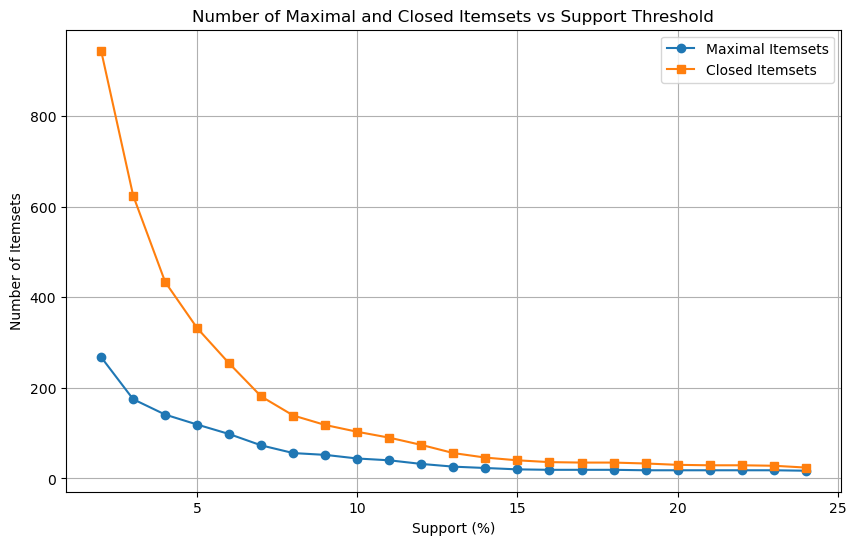

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori

# Danh sách lưu số lượng itemsets
len_max_it = []
len_cl_it = []

# Thiết lập phạm vi support
max_supp = 25  # Support tối đa (tính theo %)
zmin = 2  # Kích thước tối thiểu của itemsets

# Tính số lượng itemsets tại mỗi mức support
for i in range(2, max_supp):
    # Chuyển support từ % sang giá trị thực (giá trị nằm giữa 0-1)
    support_threshold = i / 100.0
    
    # Tìm Maximal Itemsets
    frequent_itemsets = apriori(training_df_transformed, min_support=support_threshold, use_colnames=True)
    maximal_itemsets = frequent_itemsets[
        frequent_itemsets.apply(lambda row: is_maximal(row['itemsets'], frequent_itemsets), axis=1)
    ]
    
    # Tìm Closed Itemsets
    closed_itemsets = frequent_itemsets[
        frequent_itemsets.apply(lambda row: is_closed(row['itemsets'], row['support'], frequent_itemsets), axis=1)
    ]
    
    # Lưu số lượng itemsets
    len_max_it.append(len(maximal_itemsets))
    len_cl_it.append(len(closed_itemsets))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(np.arange(2, max_supp), len_max_it, label="Maximal Itemsets", marker='o')
plt.plot(np.arange(2, max_supp), len_cl_it, label="Closed Itemsets", marker='s')

# Thêm các chi tiết biểu đồ
plt.legend()
plt.xlabel("Support (%)")
plt.ylabel("Number of Itemsets")
plt.title("Number of Maximal and Closed Itemsets vs Support Threshold")
plt.grid()
plt.show()



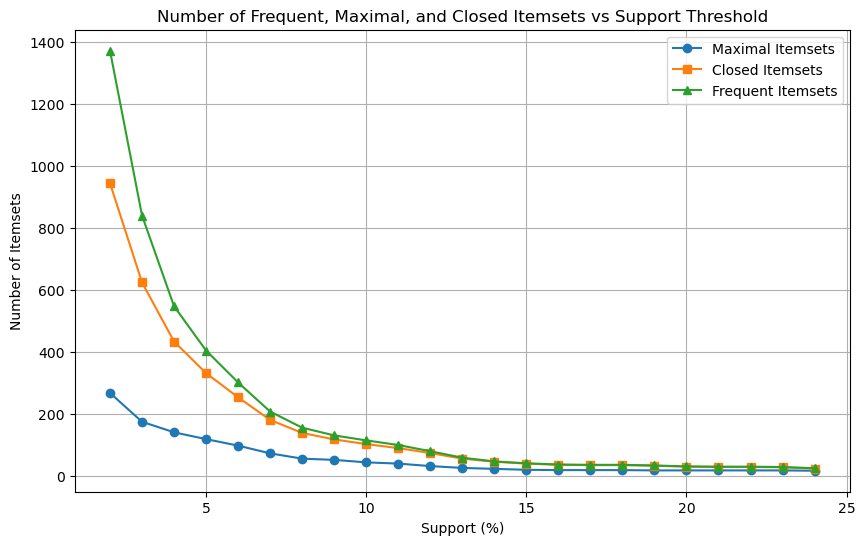

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori

# Danh sách lưu số lượng itemsets
len_max_it = []
len_cl_it = []
len_fr_it = []  # Danh sách lưu số lượng Frequent Itemsets

# Thiết lập phạm vi support
max_supp = 25  # Support tối đa (tính theo %)
zmin = 2  # Kích thước tối thiểu của itemsets

# Tính số lượng itemsets tại mỗi mức support
for i in range(2, max_supp):
    # Chuyển support từ % sang giá trị thực (giá trị nằm giữa 0-1)
    support_threshold = i / 100.0
    
    # Tìm Frequent Itemsets
    frequent_itemsets = apriori(training_df_transformed, min_support=support_threshold, use_colnames=True)
    
    # Tìm Maximal Itemsets
    maximal_itemsets = frequent_itemsets[
        frequent_itemsets.apply(lambda row: is_maximal(row['itemsets'], frequent_itemsets), axis=1)
    ]
    
    # Tìm Closed Itemsets
    closed_itemsets = frequent_itemsets[
        frequent_itemsets.apply(lambda row: is_closed(row['itemsets'], row['support'], frequent_itemsets), axis=1)
    ]
    
    # Lưu số lượng itemsets
    len_max_it.append(len(maximal_itemsets))
    len_cl_it.append(len(closed_itemsets))
    len_fr_it.append(len(frequent_itemsets))  # Lưu số lượng Frequent Itemsets

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(np.arange(2, max_supp), len_max_it, label="Maximal Itemsets", marker='o')
plt.plot(np.arange(2, max_supp), len_cl_it, label="Closed Itemsets", marker='s')
plt.plot(np.arange(2, max_supp), len_fr_it, label="Frequent Itemsets", marker='^')  # Đường biểu diễn Frequent Itemsets

# Thêm các chi tiết biểu đồ
plt.legend()
plt.xlabel("Support (%)")
plt.ylabel("Number of Itemsets")
plt.title("Number of Frequent, Maximal, and Closed Itemsets vs Support Threshold")
plt.grid()
plt.show()


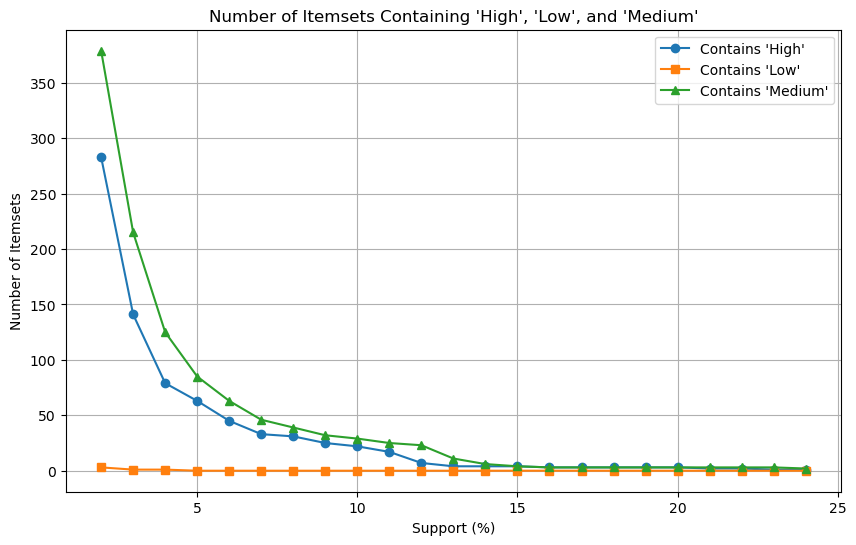

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori

# Danh sách lưu số lượng các tập hợp chứa các mục "High", "Low", "Medium"
filter_high = []
filter_low = []
filter_medium = []

# Thiết lập phạm vi support
max_supp = 25  # Support tối đa (tính theo %)
zmin = 2  # Kích thước tối thiểu của itemsets

# Tính số lượng các tập hợp chứa "High", "Low", "Medium" tại mỗi mức support
for i in range(2, max_supp):
    # Chuyển support từ % sang giá trị thực (giá trị nằm giữa 0-1)
    support_threshold = i / 100.0
    
    # Tìm tất cả các tập phổ biến với mức support hiện tại
    frequent_itemsets = apriori(training_df_transformed, min_support=support_threshold, use_colnames=True)
    
    # Lọc các tập hợp chứa "High", "Low", "Medium" trong attribute averageRatingBin
    filter_high.append(len([item for item in frequent_itemsets['itemsets'] if "High" in item]))
    filter_low.append(len([item for item in frequent_itemsets['itemsets'] if "Low" in item]))
    filter_medium.append(len([item for item in frequent_itemsets['itemsets'] if "Medium" in item]))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(np.arange(2, max_supp), filter_high, label="Contains 'High'", marker='o')
plt.plot(np.arange(2, max_supp), filter_low, label="Contains 'Low'", marker='s')
plt.plot(np.arange(2, max_supp), filter_medium, label="Contains 'Medium'", marker='^')

# Thêm các chi tiết biểu đồ
plt.legend()
plt.xlabel("Support (%)")
plt.ylabel("Number of Itemsets")
plt.title("Number of Itemsets Containing 'High', 'Low', and 'Medium'")
plt.grid()
plt.show()


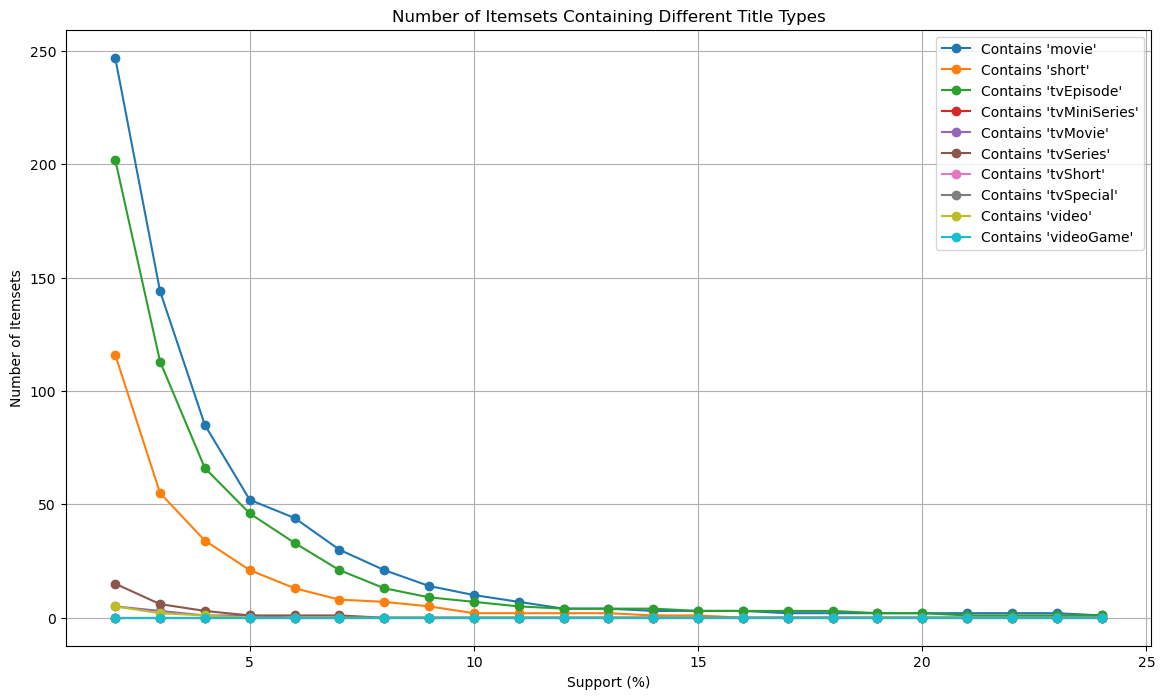

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori

# Giá trị trong attribute titleType
title_types = ["movie", "short", "tvEpisode", "tvMiniSeries", "tvMovie", 
               "tvSeries", "tvShort", "tvSpecial", "video", "videoGame"]

# Danh sách lưu số lượng các tập hợp chứa từng giá trị trong titleType
title_type_filters = {title: [] for title in title_types}

# Thiết lập phạm vi support
max_supp = 25  # Support tối đa (tính theo %)
zmin = 2  # Kích thước tối thiểu của itemsets

# Tính số lượng các tập hợp chứa từng giá trị trong titleType tại mỗi mức support
for i in range(2, max_supp):
    # Chuyển support từ % sang giá trị thực (giá trị nằm giữa 0-1)
    support_threshold = i / 100.0
    
    # Tìm tất cả các tập phổ biến với mức support hiện tại
    frequent_itemsets = apriori(training_df_transformed, min_support=support_threshold, use_colnames=True)
    
    # Lọc các tập hợp chứa từng giá trị trong titleType
    for title in title_types:
        title_type_filters[title].append(len([item for item in frequent_itemsets['itemsets'] if title in item]))

# Vẽ biểu đồ
plt.figure(figsize=(14, 8))

# Vẽ đường cho mỗi giá trị trong titleType
for title, counts in title_type_filters.items():
    plt.plot(np.arange(2, max_supp), counts, label=f"Contains '{title}'", marker='o')

# Thêm các chi tiết biểu đồ
plt.legend()
plt.xlabel("Support (%)")
plt.ylabel("Number of Itemsets")
plt.title("Number of Itemsets Containing Different Title Types")
plt.grid()
plt.show()


In [29]:
pip install --upgrade mlxtend


Note: you may need to restart the kernel to use updated packages.


In [45]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Thiết lập ngưỡng hỗ trợ và độ tin cậy
min_support = 0.15  # Giá trị hỗ trợ tối thiểu
min_confidence = 0.6  # Độ tin cậy tối thiểu

# Tìm các tập phổ biến (Frequent Itemsets)
frequent_itemsets = apriori(training_df_transformed, min_support=min_support, use_colnames=True)

# Kiểm tra kết quả của Frequent Itemsets
if frequent_itemsets.empty:
    print("No frequent itemsets found with the given min_support.")
else:
    # Tìm các luật kết hợp (Association Rules)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

    # Thêm các cột thông tin
    rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

    # Tạo DataFrame cho các luật
    rules_df = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

    # Sắp xếp các luật theo Lift (độ nâng)
    rules_df = rules_df.sort_values(by="lift", axis=0, ascending=False)

    # Hiển thị kết quả
    print("Top Association Rules:")
    print(rules_df.head(10))  # Hiển thị 10 luật mạnh nhất



TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [30]:
pip install efficient-apriori


Note: you may need to restart the kernel to use updated packages.


In [87]:
from efficient_apriori import apriori

# Chuẩn bị dữ liệu giao dịch (transactions) - danh sách các danh sách
transactions = transactions_training  # Dữ liệu của bạn đã ở dạng này

# Thiết lập ngưỡng hỗ trợ và độ tin cậy
min_support = 0.15  # Giá trị hỗ trợ tối thiểu
min_confidence = 0.6  # Độ tin cậy tối thiểu

# Chạy Apriori để tìm tập phổ biến và luật kết hợp
itemsets, rules = apriori(transactions, min_support=min_support, min_confidence=min_confidence)

# Hiển thị các luật kết hợp
print("Association Rules:")
for rule in sorted(rules, key=lambda x: x.lift, reverse=True):
    print(rule)


Association Rules:
{(0.107, 0.195]_Votes} -> {(0.107, 0.195]_Ratings} (conf: 0.999, supp: 0.232, lift: 4.294, conv: 710.564)
{(0.107, 0.195]_Ratings} -> {(0.107, 0.195]_Votes} (conf: 0.998, supp: 0.232, lift: 4.294, conv: 355.782)
{(0.195, 0.34]_Ratings} -> {(0.195, 0.341]_Votes} (conf: 0.999, supp: 0.247, lift: 4.046, conv: 987.740)
{(0.195, 0.341]_Votes} -> {(0.195, 0.34]_Ratings} (conf: 0.999, supp: 0.247, lift: 4.046, conv: 741.055)
{(0.341, 1.0]_Votes} -> {(0.34, 1.0]_Ratings} (conf: 1.000, supp: 0.249, lift: 4.012, conv: 750721545.991)
{(0.34, 1.0]_Ratings} -> {(0.341, 1.0]_Votes} (conf: 0.999, supp: 0.249, lift: 4.012, conv: 994.454)
{(-0.001, 0.107]_Votes, (-0.001, 0.117]_Images} -> {(-0.001, 0.107]_Ratings} (conf: 0.999, supp: 0.194, lift: 3.683, conv: 563.381)
{(-0.001, 0.107]_Ratings} -> {(-0.001, 0.107]_Votes, (-0.001, 0.117]_Images} (conf: 0.714, supp: 0.194, lift: 3.683, conv: 2.823)
{(-0.001, 0.107]_Votes} -> {(-0.001, 0.107]_Ratings} (conf: 0.998, supp: 0.271, lift: 3.6

In [89]:
import pandas as pd

# Chuẩn bị dữ liệu cho DataFrame
rules_data = []

# Giả sử `rules` là danh sách các luật từ efficient_apriori
for rule in rules:
    rules_data.append({
        'Antecedents': ', '.join(list(rule.lhs)),
        'Consequents': ', '.join(list(rule.rhs)),
        'Support': rule.support,
        'Confidence': rule.confidence,
        'Lift': rule.lift,
        'Conviction': rule.conviction
    })

# Tạo DataFrame
rules_df = pd.DataFrame(rules_data)

# Sắp xếp theo Lift giảm dần
rules_df = rules_df.sort_values(by='Lift', ascending=False)

# Hiển thị 10 luật mạnh nhất
print("Top 10 Association Rules:")
print(rules_df.head(10))

# Nếu bạn sử dụng Jupyter Notebook, hiển thị trực tiếp bảng
try:
    import IPython
    from IPython.display import display
    display(rules_df.head(10))
except ImportError:
    pass


Top 10 Association Rules:
                                      Antecedents  \
7                          (0.107, 0.195]_Ratings   
6                            (0.107, 0.195]_Votes   
9                            (0.195, 0.341]_Votes   
8                           (0.195, 0.34]_Ratings   
10                             (0.341, 1.0]_Votes   
11                            (0.34, 1.0]_Ratings   
16  (-0.001, 0.107]_Votes, (-0.001, 0.117]_Images   
20                        (-0.001, 0.107]_Ratings   
1                         (-0.001, 0.107]_Ratings   
0                           (-0.001, 0.107]_Votes   

                                      Consequents   Support  Confidence  \
7                            (0.107, 0.195]_Votes  0.232150    0.997843   
6                          (0.107, 0.195]_Ratings  0.232150    0.998920   
9                           (0.195, 0.34]_Ratings  0.246706    0.998984   
8                            (0.195, 0.341]_Votes  0.246706    0.999238   
10             

,Antecedents,Consequents,Support,Confidence,Lift,Conviction
7,"(0.107, 0.195]_Ratings","(0.107, 0.195]_Votes",0.232150,0.997843,4.293632,3.557822e+02
6,"(0.107, 0.195]_Votes","(0.107, 0.195]_Ratings",0.232150,0.998920,4.293632,7.105640e+02
9,"(0.195, 0.341]_Votes","(0.195, 0.34]_Ratings",0.246706,0.998984,4.046201,7.410554e+02
8,"(0.195, 0.34]_Ratings","(0.195, 0.341]_Votes",0.246706,0.999238,4.046201,9.877402e+02
10,"(0.341, 1.0]_Votes","(0.34, 1.0]_Ratings",0.249090,1.000000,4.011578,7.507215e+08
11,"(0.34, 1.0]_Ratings","(0.341, 1.0]_Votes",0.249090,0.999245,4.011578,9.944535e+02
16,"(-0.001, 0.107]_Votes, (-0.001, 0.117]_Images","(-0.001, 0.107]_Ratings",0.193751,0.998706,3.682874,5.633807e+02
20,"(-0.001, 0.107]_Ratings","(-0.001, 0.107]_Votes, (-0.001, 0.117]_Images",0.193751,0.714484,3.682874,2.822953e+00
1,"(-0.001, 0.107]_Ratings","(-0.001, 0.107]_Votes",0.271113,0.999769,3.681680,3.148338e+03
0,"(-0.001, 0.107]_Votes","(-0.001, 0.107]_Ratings",0.271113,0.998383,3.681680,4.506213e+02


In [91]:
import pandas as pd
from tabulate import tabulate

# 1. Tạo DataFrame từ các luật (giả định `rules_df` đã được tạo từ đoạn code của bạn)
# rules_df đã bao gồm: ['Antecedents', 'Consequents', 'Support', 'Confidence', 'Lift', 'Conviction']

# 2. Lọc các luật liên quan đến 'averageRatingBin'
attribute = "averageRatingBin"
related_rules = rules_df[
    rules_df['Antecedents'].apply(lambda x: attribute in x) |
    rules_df['Consequents'].apply(lambda x: attribute in x)
]

# 3. Hiển thị các luật liên quan
if not related_rules.empty:
    # Chuẩn bị dữ liệu để in đẹp
    related_rules_table = related_rules[['Antecedents', 'Consequents', 'Support', 'Confidence', 'Lift']].copy()

    # In bảng đẹp
    print("\nRules related to 'averageRatingBin':")
    print(tabulate(related_rules_table, headers="keys", tablefmt="pretty", showindex=False))

    # Nếu sử dụng Jupyter Notebook, hiển thị bảng
    try:
        from IPython.display import display
        display(related_rules_table)
    except ImportError:
        pass
else:
    print("No rules related to 'averageRatingBin' found.")


No rules related to 'averageRatingBin' found.


In [93]:
import pandas as pd
from tabulate import tabulate

# 1. Tạo DataFrame từ các luật (giả định `rules_df` đã được tạo từ đoạn code của bạn)
# rules_df đã bao gồm: ['Antecedents', 'Consequents', 'Support', 'Confidence', 'Lift', 'Conviction']

# 2. Lọc các luật liên quan đến 'averageRatingBin'
attribute = "titleType"
related_rules = rules_df[
    rules_df['Antecedents'].apply(lambda x: attribute in x) |
    rules_df['Consequents'].apply(lambda x: attribute in x)
]

# 3. Hiển thị các luật liên quan
if not related_rules.empty:
    # Chuẩn bị dữ liệu để in đẹp
    related_rules_table = related_rules[['Antecedents', 'Consequents', 'Support', 'Confidence', 'Lift']].copy()

    # In bảng đẹp
    print("\nRules related to 'titleType':")
    print(tabulate(related_rules_table, headers="keys", tablefmt="pretty", showindex=False))

    # Nếu sử dụng Jupyter Notebook, hiển thị bảng
    try:
        from IPython.display import display
        display(related_rules_table)
    except ImportError:
        pass
else:
    print("No rules related to 'titleType' found.")

No rules related to 'titleType' found.


In [95]:
import pandas as pd

# Chuẩn bị dữ liệu cho DataFrame
rules_data = []

# Giả sử `rules` là danh sách các luật từ efficient_apriori
for rule in rules:
    rules_data.append({
        'Antecedents': ', '.join(list(rule.lhs)),
        'Consequents': ', '.join(list(rule.rhs)),
        'Support': rule.support,
        'Confidence': rule.confidence,
        'Lift': rule.lift,
        'Conviction': rule.conviction
    })

# Tạo DataFrame
rules_df = pd.DataFrame(rules_data)

# Sắp xếp theo Lift giảm dần
rules_df = rules_df.sort_values(by='Lift', ascending=False)

# Hiển thị tất cả các luật
print("All Association Rules:")
print(rules_df)

# Nếu bạn sử dụng Jupyter Notebook, hiển thị trực tiếp toàn bộ bảng
try:
    import IPython
    from IPython.display import display
    display(rules_df)
except ImportError:
    pass


All Association Rules:
                                        Antecedents  \
7                            (0.107, 0.195]_Ratings   
6                              (0.107, 0.195]_Votes   
9                              (0.195, 0.341]_Votes   
8                             (0.195, 0.34]_Ratings   
10                               (0.341, 1.0]_Votes   
11                              (0.34, 1.0]_Ratings   
16    (-0.001, 0.107]_Votes, (-0.001, 0.117]_Images   
20                          (-0.001, 0.107]_Ratings   
1                           (-0.001, 0.107]_Ratings   
0                             (-0.001, 0.107]_Votes   
17  (-0.001, 0.107]_Ratings, (-0.001, 0.117]_Images   
19                            (-0.001, 0.107]_Votes   
13                             (0.747, 1.0]_Runtime   
14                                        tvEpisode   
2                           (-0.001, 0.107]_Ratings   
18   (-0.001, 0.107]_Ratings, (-0.001, 0.107]_Votes   
3                             (-0.001, 0.1

,Antecedents,Consequents,Support,Confidence,Lift,Conviction
7,"(0.107, 0.195]_Ratings","(0.107, 0.195]_Votes",0.232150,0.997843,4.293632,3.557822e+02
6,"(0.107, 0.195]_Votes","(0.107, 0.195]_Ratings",0.232150,0.998920,4.293632,7.105640e+02
9,"(0.195, 0.341]_Votes","(0.195, 0.34]_Ratings",0.246706,0.998984,4.046201,7.410554e+02
8,"(0.195, 0.34]_Ratings","(0.195, 0.341]_Votes",0.246706,0.999238,4.046201,9.877402e+02
10,"(0.341, 1.0]_Votes","(0.34, 1.0]_Ratings",0.249090,1.000000,4.011578,7.507215e+08
11,"(0.34, 1.0]_Ratings","(0.341, 1.0]_Votes",0.249090,0.999245,4.011578,9.944535e+02
16,"(-0.001, 0.107]_Votes, (-0.001, 0.117]_Images","(-0.001, 0.107]_Ratings",0.193751,0.998706,3.682874,5.633807e+02
20,"(-0.001, 0.107]_Ratings","(-0.001, 0.107]_Votes, (-0.001, 0.117]_Images",0.193751,0.714484,3.682874,2.822953e+00
1,"(-0.001, 0.107]_Ratings","(-0.001, 0.107]_Votes",0.271113,0.999769,3.681680,3.148338e+03
0,"(-0.001, 0.107]_Votes","(-0.001, 0.107]_Ratings",0.271113,0.998383,3.681680,4.506213e+02


In [97]:
# Hiển thị 10 luật mạnh nhất
print("Top 10 Association Rules:")
print(rules_df.head(10))

# Nếu bạn sử dụng Jupyter Notebook, hiển thị trực tiếp bảng
try:
    import IPython
    from IPython.display import display
    display(rules_df.head(10))
except ImportError:
    pass

Top 10 Association Rules:
                                      Antecedents  \
7                          (0.107, 0.195]_Ratings   
6                            (0.107, 0.195]_Votes   
9                            (0.195, 0.341]_Votes   
8                           (0.195, 0.34]_Ratings   
10                             (0.341, 1.0]_Votes   
11                            (0.34, 1.0]_Ratings   
16  (-0.001, 0.107]_Votes, (-0.001, 0.117]_Images   
20                        (-0.001, 0.107]_Ratings   
1                         (-0.001, 0.107]_Ratings   
0                           (-0.001, 0.107]_Votes   

                                      Consequents   Support  Confidence  \
7                            (0.107, 0.195]_Votes  0.232150    0.997843   
6                          (0.107, 0.195]_Ratings  0.232150    0.998920   
9                           (0.195, 0.34]_Ratings  0.246706    0.998984   
8                            (0.195, 0.341]_Votes  0.246706    0.999238   
10             

,Antecedents,Consequents,Support,Confidence,Lift,Conviction
7,"(0.107, 0.195]_Ratings","(0.107, 0.195]_Votes",0.232150,0.997843,4.293632,3.557822e+02
6,"(0.107, 0.195]_Votes","(0.107, 0.195]_Ratings",0.232150,0.998920,4.293632,7.105640e+02
9,"(0.195, 0.341]_Votes","(0.195, 0.34]_Ratings",0.246706,0.998984,4.046201,7.410554e+02
8,"(0.195, 0.34]_Ratings","(0.195, 0.341]_Votes",0.246706,0.999238,4.046201,9.877402e+02
10,"(0.341, 1.0]_Votes","(0.34, 1.0]_Ratings",0.249090,1.000000,4.011578,7.507215e+08
11,"(0.34, 1.0]_Ratings","(0.341, 1.0]_Votes",0.249090,0.999245,4.011578,9.944535e+02
16,"(-0.001, 0.107]_Votes, (-0.001, 0.117]_Images","(-0.001, 0.107]_Ratings",0.193751,0.998706,3.682874,5.633807e+02
20,"(-0.001, 0.107]_Ratings","(-0.001, 0.107]_Votes, (-0.001, 0.117]_Images",0.193751,0.714484,3.682874,2.822953e+00
1,"(-0.001, 0.107]_Ratings","(-0.001, 0.107]_Votes",0.271113,0.999769,3.681680,3.148338e+03
0,"(-0.001, 0.107]_Votes","(-0.001, 0.107]_Ratings",0.271113,0.998383,3.681680,4.506213e+02


In [99]:
# Hiển thị tiếp 10 luật mạnh kế tiếp (từ 11 đến 20)
print("Next Top 10 Association Rules:")
print(rules_df.iloc[10:20])

# Nếu bạn sử dụng Jupyter Notebook, hiển thị trực tiếp bảng
try:
    display(rules_df.iloc[10:20])
except ImportError:
    pass

Next Top 10 Association Rules:
                                        Antecedents  \
17  (-0.001, 0.107]_Ratings, (-0.001, 0.117]_Images   
19                            (-0.001, 0.107]_Votes   
13                             (0.747, 1.0]_Runtime   
14                                        tvEpisode   
2                           (-0.001, 0.107]_Ratings   
18   (-0.001, 0.107]_Ratings, (-0.001, 0.107]_Votes   
3                             (-0.001, 0.107]_Votes   
12                           (0.545, 0.675]_Runtime   
4                           (-0.001, 0.415]_Credits   
15                                            movie   

                                        Consequents   Support  Confidence  \
17                            (-0.001, 0.107]_Votes  0.193751    0.999676   
19  (-0.001, 0.107]_Ratings, (-0.001, 0.117]_Images  0.193751    0.713494   
13                                            movie  0.162191    0.667959   
14                                             High  0.

,Antecedents,Consequents,Support,Confidence,Lift,Conviction
17,"(-0.001, 0.107]_Ratings, (-0.001, 0.117]_Images","(-0.001, 0.107]_Votes",0.193751,0.999676,3.681340,2250.168103
19,"(-0.001, 0.107]_Votes","(-0.001, 0.107]_Ratings, (-0.001, 0.117]_Images",0.193751,0.713494,3.681340,2.813851
13,"(0.747, 1.0]_Runtime",movie,0.162191,0.667959,2.016656,2.014144
14,tvEpisode,High,0.204417,0.694078,1.576712,1.829857
2,"(-0.001, 0.107]_Ratings","(-0.001, 0.117]_Images",0.193814,0.714715,1.407703,1.725584
18,"(-0.001, 0.107]_Ratings, (-0.001, 0.107]_Votes","(-0.001, 0.117]_Images",0.193751,0.714649,1.407573,1.725185
3,"(-0.001, 0.107]_Votes","(-0.001, 0.117]_Images",0.194002,0.714418,1.407117,1.723786
12,"(0.545, 0.675]_Runtime",High,0.152968,0.615035,1.397154,1.454144
4,"(-0.001, 0.415]_Credits","(-0.001, 0.117]_Images",0.182457,0.694531,1.367947,1.611562
15,movie,Medium,0.231459,0.698807,1.344956,1.595069


In [45]:
# Hiển thị tiếp 10 luật mạnh kế tiếp (từ 11 đến 20)
print("Next Top 10 Association Rules:")
print(rules_df.iloc[20:30])

# Nếu bạn sử dụng Jupyter Notebook, hiển thị trực tiếp bảng
try:
    display(rules_df.iloc[20:30])
except ImportError:
    pass

Next Top 10 Association Rules:
                                 Antecedents  \
56                 (0.341, 1.0]_Votes, movie   
48   (0.302, 1.0]_Images, (0.341, 1.0]_Votes   
52                  (0.341, 1.0]_Votes, High   
13                        (0.341, 1.0]_Votes   
14                       (0.34, 1.0]_Ratings   
51  (0.34, 1.0]_Ratings, (0.61, 1.0]_Credits   
55               (0.34, 1.0]_Ratings, Medium   
57                (0.34, 1.0]_Ratings, movie   
66           (-0.001, 0.107]_Ratings, Medium   
65             (-0.001, 0.107]_Votes, Medium   

                                        Consequents   Support  Confidence  \
56                              (0.34, 1.0]_Ratings  0.108546    1.000000   
48                              (0.34, 1.0]_Ratings  0.135337    1.000000   
52                              (0.34, 1.0]_Ratings  0.110177    1.000000   
13                              (0.34, 1.0]_Ratings  0.249090    1.000000   
14                               (0.341, 1.0]_Votes  0.

,Antecedents,Consequents,Support,Confidence,Lift,Conviction
56,"(0.341, 1.0]_Votes, movie","(0.34, 1.0]_Ratings",0.108546,1.000000,4.011578,7.507215e+08
48,"(0.302, 1.0]_Images, (0.341, 1.0]_Votes","(0.34, 1.0]_Ratings",0.135337,1.000000,4.011578,7.507215e+08
52,"(0.341, 1.0]_Votes, High","(0.34, 1.0]_Ratings",0.110177,1.000000,4.011578,7.507215e+08
13,"(0.341, 1.0]_Votes","(0.34, 1.0]_Ratings",0.249090,1.000000,4.011578,7.507215e+08
14,"(0.34, 1.0]_Ratings","(0.341, 1.0]_Votes",0.249090,0.999245,4.011578,9.944535e+02
51,"(0.34, 1.0]_Ratings, (0.61, 1.0]_Credits","(0.341, 1.0]_Votes",0.128623,0.999025,4.010697,7.704326e+02
55,"(0.34, 1.0]_Ratings, Medium","(0.341, 1.0]_Votes",0.126239,0.999007,4.010623,7.561654e+02
57,"(0.34, 1.0]_Ratings, movie","(0.341, 1.0]_Votes",0.108546,0.998269,4.007660,4.337753e+02
66,"(-0.001, 0.107]_Ratings, Medium","(-0.001, 0.107]_Votes, (-0.001, 0.117]_Images",0.102836,0.752525,3.878961,3.256891e+00
65,"(-0.001, 0.107]_Votes, Medium","(-0.001, 0.107]_Ratings, (-0.001, 0.117]_Images",0.102836,0.751490,3.877387,3.244082e+00


In [51]:
from efficient_apriori import apriori
import numpy as np

# Dữ liệu giao dịch
transactions = transactions_training  # Đầu vào là danh sách giao dịch

# Phạm vi cho support và confidence
min_sup = 1
max_sup = 20
min_conf = 50
max_conf = 90

# Danh sách lưu trữ số lượng luật
len_r = []

# Duyệt qua các mức support
for i in range(min_sup, max_sup):  # support
    len_r_wrt_i = []
    for j in range(min_conf, max_conf):  # confidence
        # Chuyển đổi support và confidence thành giá trị thực
        supp = i / 100.0
        conf = j / 100.0
        
        # Chạy Apriori
        _, rules = apriori(transactions, min_support=supp, min_confidence=conf)
        
        # Lưu số lượng luật
        len_r_wrt_i.append(len(rules))  # Số lượng luật tại support i và confidence j

    len_r.append(len_r_wrt_i)

# Chuyển đổi sang mảng numpy
len_r = np.array(len_r)

# Hiển thị số lượng luật cho các ngưỡng
print("Matrix of rule counts:")
print(len_r)


Matrix of rule counts:
[[6545 6340 6118 5916 5737 5531 5360 5204 5014 4811 4601 4409 4234 4072
  3893 3762 3625 3461 3377 3218 3096 2978 2841 2728 2624 2497 2380 2300
  2200 2125 2047 1974 1908 1866 1818 1759 1703 1638 1569 1513]
 [3109 3013 2911 2801 2692 2589 2512 2441 2349 2275 2169 2074 1992 1919
  1814 1755 1690 1604 1564 1481 1420 1370 1289 1228 1158 1098 1038 1011
   967  926  903  873  857  852  843  820  803  765  723  693]
 [1707 1642 1590 1523 1456 1377 1339 1297 1239 1227 1174 1106 1061 1021
   949  931  892  853  828  780  752  723  689  660  613  598  560  547
   531  514  501  492  482  477  469  460  443  420  406  397]
 [ 921  899  870  829  801  752  737  719  692  683  659  648  620  594
   543  528  504  486  475  439  419  403  382  378  355  346  319  309
   304  294  287  286  277  275  272  267  260  250  246  238]
 [ 574  554  531  499  479  448  442  434  424  417  407  403  387  368
   342  329  310  302  294  285  273  263  247  245  234  230  213  204
   20

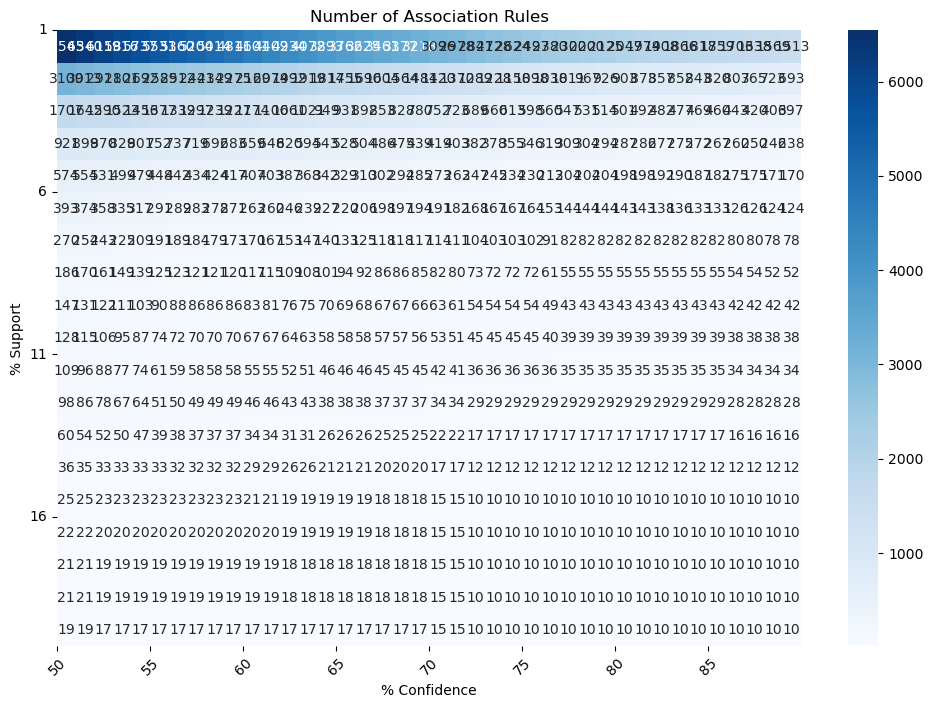

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Giả sử len_r đã được tính trước đó và là một mảng numpy

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(len_r, cmap="Blues", annot=True, fmt='g')

# Đặt nhãn cho trục Y (Support)
plt.yticks(
    np.arange(0, max_sup - min_sup, 5),
    np.arange(min_sup, max_sup, 5),
    rotation=0
)

# Đặt nhãn cho trục X (Confidence)
plt.xticks(
    np.arange(0, max_conf - min_conf, 5),
    np.arange(min_conf, max_conf, 5),
    rotation=45
)

# Thêm nhãn trục và tiêu đề
plt.xlabel("% Confidence")
plt.ylabel("% Support")
plt.title("Number of Association Rules")

# Hiển thị biểu đồ
plt.show()


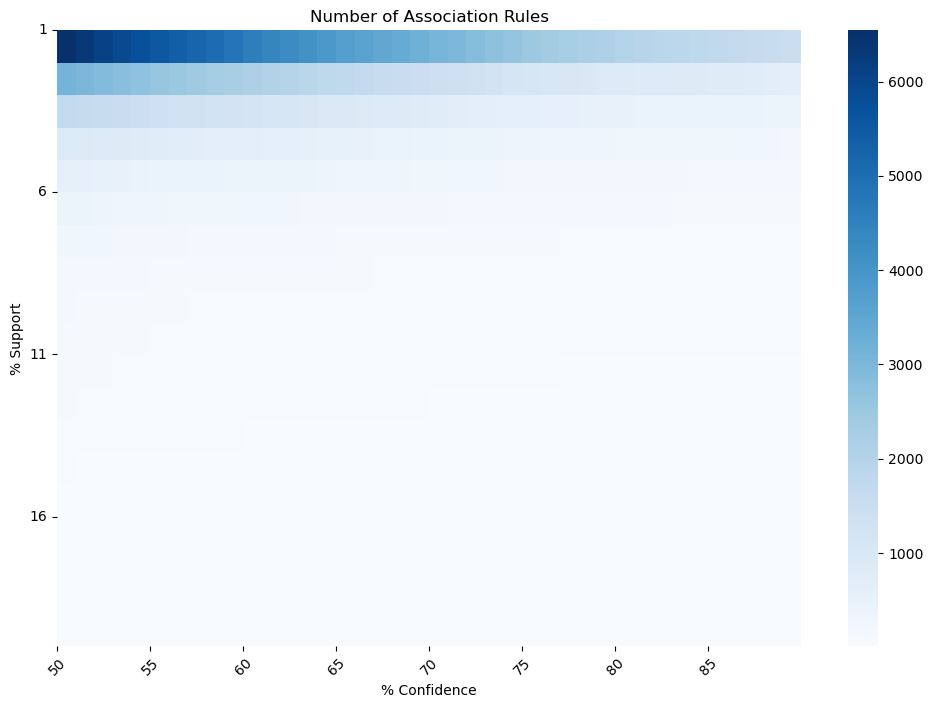

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Vẽ heatmap không hiển thị số trong các ô
plt.figure(figsize=(12, 8))
sns.heatmap(len_r, cmap="Blues")

# Đặt nhãn cho trục Y (Support)
plt.yticks(
    np.arange(0, max_sup - min_sup, 5),
    np.arange(min_sup, max_sup, 5),
    rotation=0
)

# Đặt nhãn cho trục X (Confidence)
plt.xticks(
    np.arange(0, max_conf - min_conf, 5),
    np.arange(min_conf, max_conf, 5),
    rotation=45
)

# Thêm nhãn trục và tiêu đề
plt.xlabel("% Confidence")
plt.ylabel("% Support")
plt.title("Number of Association Rules")

# Hiển thị biểu đồ
plt.show()


In [57]:
# Dữ liệu tập kiểm tra (transactions_testing): Danh sách các danh sách
test_set_predictions = []

# Rule đã chọn
antecedents = set(["(0.107, 0.195]_Votes_Votes"])
consequents = set(["(-0.001, 0.117]_Images_Images", "(0.107, 0.195]_Ratings_Ratings"])

# Áp dụng rule
for transaction in transactions_testing:
    # Nếu giao dịch chứa Antecedents
    if antecedents.issubset(set(transaction)):
        # Dự đoán Consequents cho giao dịch
        prediction = list(consequents.difference(set(transaction)))
        test_set_predictions.append(prediction)
    else:
        # Nếu không chứa Antecedents, không dự đoán gì
        test_set_predictions.append([])

# Hiển thị kết quả dự đoán
for i, prediction in enumerate(test_set_predictions[:10]):  # Hiển thị 10 kết quả đầu tiên
    print(f"Transaction {i+1}: Prediction: {prediction}")


Transaction 1: Prediction: []
Transaction 2: Prediction: []
Transaction 3: Prediction: []
Transaction 4: Prediction: []
Transaction 5: Prediction: []
Transaction 6: Prediction: []
Transaction 7: Prediction: []
Transaction 8: Prediction: []
Transaction 9: Prediction: []
Transaction 10: Prediction: []


In [59]:
# Rule mới
antecedents = set(["(-0.001, 0.117]_Images_Images", "(0.107, 0.195]_Ratings_Ratings"])
consequents = set(["(0.107, 0.195]_Votes_Votes"])

# Áp dụng rule
test_set_predictions = []  # Reset danh sách dự đoán

for transaction in transactions_testing:
    # Nếu giao dịch chứa Antecedents
    if antecedents.issubset(set(transaction)):
        # Dự đoán Consequents cho giao dịch
        prediction = list(consequents.difference(set(transaction)))
        test_set_predictions.append(prediction)
    else:
        # Nếu không chứa Antecedents, không dự đoán gì
        test_set_predictions.append([])

# Hiển thị kết quả dự đoán
for i, prediction in enumerate(test_set_predictions[:10]):  # Hiển thị 10 kết quả đầu tiên
    print(f"Transaction {i+1}: Prediction: {prediction}")


Transaction 1: Prediction: []
Transaction 2: Prediction: []
Transaction 3: Prediction: []
Transaction 4: Prediction: []
Transaction 5: Prediction: []
Transaction 6: Prediction: []
Transaction 7: Prediction: []
Transaction 8: Prediction: []
Transaction 9: Prediction: []
Transaction 10: Prediction: []


In [61]:
# Rule mới
antecedents = set(["tvEpisode"])
consequents = set(["(-0.001, 0.117]_Images_Images"])

# Áp dụng rule
test_set_predictions = []  # Reset danh sách dự đoán

for transaction in transactions_testing:
    # Nếu giao dịch chứa Antecedents
    if antecedents.issubset(set(transaction)):
        # Dự đoán Consequents cho giao dịch
        prediction = list(consequents.difference(set(transaction)))
        test_set_predictions.append(prediction)
    else:
        # Nếu không chứa Antecedents, không dự đoán gì
        test_set_predictions.append([])

# Hiển thị kết quả dự đoán
for i, prediction in enumerate(test_set_predictions[:10]):  # Hiển thị 10 kết quả đầu tiên
    print(f"Transaction {i+1}: Prediction: {prediction}")


Transaction 1: Prediction: []
Transaction 2: Prediction: []
Transaction 3: Prediction: []
Transaction 4: Prediction: ['(-0.001, 0.117]_Images_Images']
Transaction 5: Prediction: ['(-0.001, 0.117]_Images_Images']
Transaction 6: Prediction: []
Transaction 7: Prediction: []
Transaction 8: Prediction: []
Transaction 9: Prediction: []
Transaction 10: Prediction: []


Accuracy: 0.70


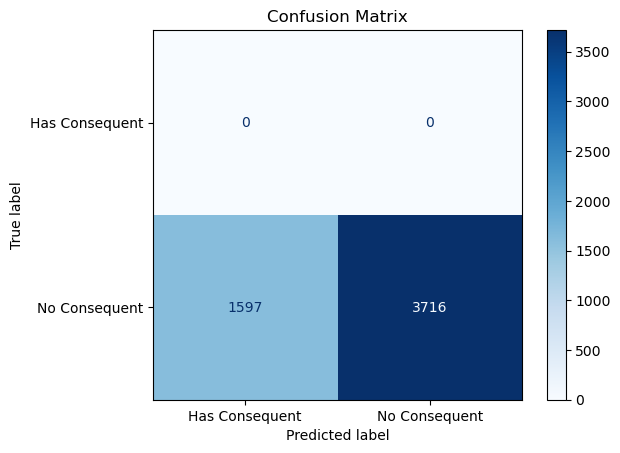

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Tạo nhãn thực tế (y_true) và nhãn dự đoán (y_pred)
y_true = []
y_pred = []

# Gắn nhãn thực tế và dự đoán
for transaction, prediction in zip(transactions_testing, test_set_predictions):
    # Gắn nhãn thực tế
    if "(-0.001, 0.117]_Images_Images" in transaction:
        y_true.append(1)  # 1: Có "(-0.001, 0.117]_Images_Images"
    else:
        y_true.append(0)  # 0: Không có

    # Gắn nhãn dự đoán
    if prediction:
        y_pred.append(1)  # 1: Dự đoán rằng có "(-0.001, 0.117]_Images_Images"
    else:
        y_pred.append(0)  # 0: Không dự đoán gì

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Has Consequent", "No Consequent"])
disp.plot(cmap=plt.cm.Blues)

# Tính Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Hiển thị ma trận nhầm lẫn
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.70


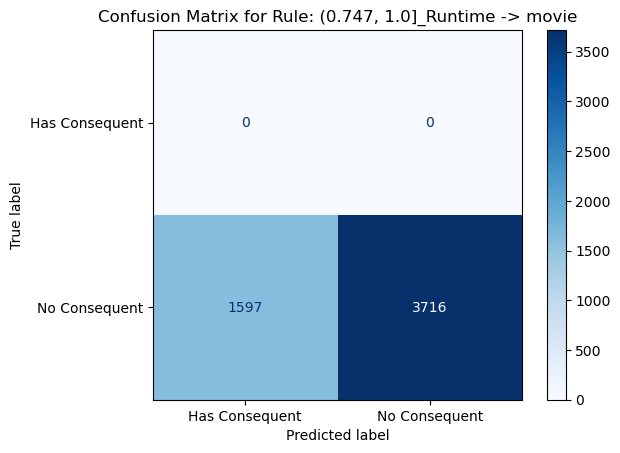

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Tạo nhãn thực tế (y_true) và nhãn dự đoán (y_pred)
y_true = []
y_pred = []

# Gắn nhãn thực tế và dự đoán
for transaction, prediction in zip(transactions_testing, test_set_predictions):
    # Gắn nhãn thực tế
    if "(0.747, 1.0]_Runtime" in transaction and "movie" in transaction:
        y_true.append(1)  # 1: Thỏa mãn rule (0.747, 1.0]_Runtime -> movie
    else:
        y_true.append(0)  # 0: Không thỏa mãn rule

    # Gắn nhãn dự đoán
    if prediction:  # Dự đoán là rule được áp dụng
        y_pred.append(1)  # 1: Dự đoán rằng thỏa mãn rule
    else:
        y_pred.append(0)  # 0: Không dự đoán gì

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Has Consequent", "No Consequent"])
disp.plot(cmap=plt.cm.Blues)

# Tính Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Hiển thị ma trận nhầm lẫn
plt.title("Confusion Matrix for Rule: (0.747, 1.0]_Runtime -> movie")
plt.show()


Accuracy: 0.91


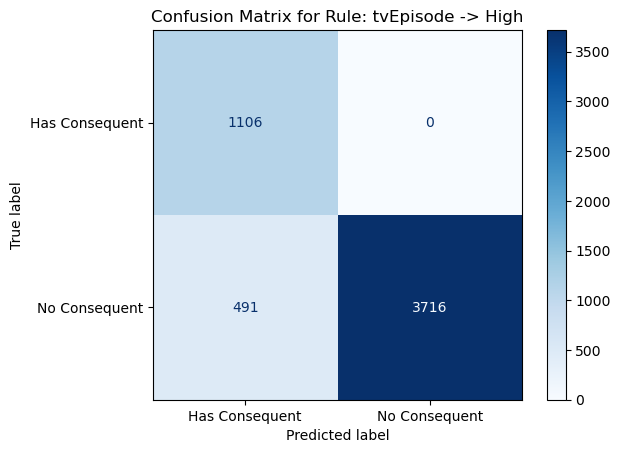

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Tạo nhãn thực tế (y_true) và nhãn dự đoán (y_pred)
y_true = []
y_pred = []

# Gắn nhãn thực tế và dự đoán
for transaction, prediction in zip(transactions_testing, test_set_predictions):
    # Gắn nhãn thực tế
    if "tvEpisode" in transaction and "High" in transaction:
        y_true.append(1)  # 1: Thỏa mãn rule tvEpisode -> High
    else:
        y_true.append(0)  # 0: Không thỏa mãn rule

    # Gắn nhãn dự đoán
    if prediction:  # Dự đoán là rule được áp dụng
        y_pred.append(1)  # 1: Dự đoán rằng thỏa mãn rule
    else:
        y_pred.append(0)  # 0: Không dự đoán gì

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Has Consequent", "No Consequent"])
disp.plot(cmap=plt.cm.Blues)

# Tính Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Hiển thị ma trận nhầm lẫn
plt.title("Confusion Matrix for Rule: tvEpisode -> High")
plt.show()


Accuracy: 0.70


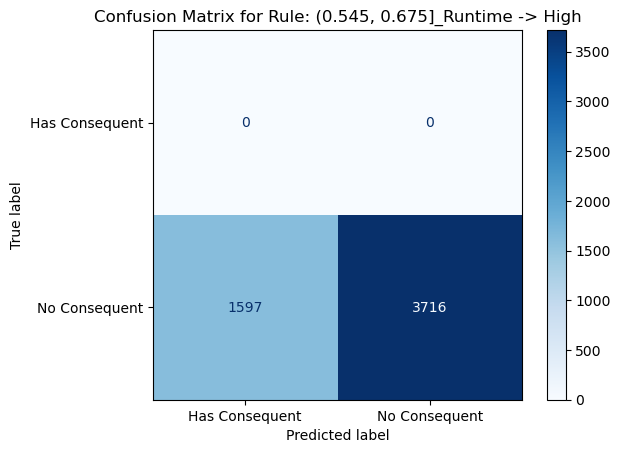

In [105]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Tạo nhãn thực tế (y_true) và nhãn dự đoán (y_pred)
y_true = []
y_pred = []

# Gắn nhãn thực tế và dự đoán
for transaction, prediction in zip(transactions_testing, test_set_predictions):
    # Gắn nhãn thực tế
    if "(0.545, 0.675]_Runtime" in transaction and "High" in transaction:
        y_true.append(1)  # 1: Thỏa mãn rule (0.545, 0.675]_Runtime -> High
    else:
        y_true.append(0)  # 0: Không thỏa mãn rule

    # Gắn nhãn dự đoán
    if prediction:  # Dự đoán là rule được áp dụng
        y_pred.append(1)  # 1: Dự đoán rằng thỏa mãn rule
    else:
        y_pred.append(0)  # 0: Không dự đoán gì

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Has Consequent", "No Consequent"])
disp.plot(cmap=plt.cm.Blues)

# Tính Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Hiển thị ma trận nhầm lẫn
plt.title("Confusion Matrix for Rule: (0.545, 0.675]_Runtime -> High")
plt.show()


Accuracy: 0.46


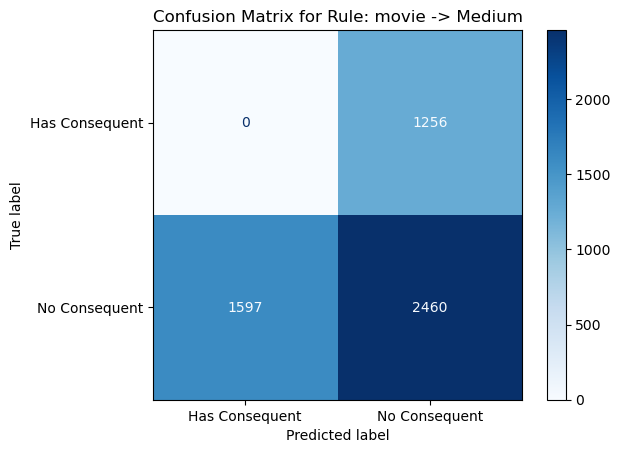

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Tạo nhãn thực tế (y_true) và nhãn dự đoán (y_pred)
y_true = []
y_pred = []

# Gắn nhãn thực tế và dự đoán
for transaction, prediction in zip(transactions_testing, test_set_predictions):
    # Gắn nhãn thực tế
    if "movie" in transaction and "Medium" in transaction:
        y_true.append(1)  # 1: Thỏa mãn rule movie -> Medium
    else:
        y_true.append(0)  # 0: Không thỏa mãn rule

    # Gắn nhãn dự đoán
    if prediction:  # Dự đoán là rule được áp dụng
        y_pred.append(1)  # 1: Dự đoán rằng thỏa mãn rule
    else:
        y_pred.append(0)  # 0: Không dự đoán gì

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Has Consequent", "No Consequent"])
disp.plot(cmap=plt.cm.Blues)

# Tính Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Hiển thị ma trận nhầm lẫn
plt.title("Confusion Matrix for Rule: movie -> Medium")
plt.show()


In [109]:
#fp-growth
# Import thư viện cần thiết
from mlxtend.frequent_patterns import fpgrowth

# Thiết lập ngưỡng hỗ trợ tối thiểu
min_support = 0.15  # Ví dụ: 15%

# Chạy FP-Growth
frequent_itemsets_fp = fpgrowth(training_df_transformed, min_support=min_support, use_colnames=True)

# Lọc các itemset có từ 2 mục trở lên
frequent_itemsets_fp = frequent_itemsets_fp[frequent_itemsets_fp['itemsets'].apply(lambda x: len(x) >= 2)]

# Hiển thị các tập phổ biến sau khi lọc
print("Frequent Itemsets from FP-Growth (with 2 or more items):")
print(frequent_itemsets_fp)


Frequent Itemsets from FP-Growth (with 2 or more items):
     support                                           itemsets
24  0.259066                   (Medium, (-0.001, 0.117]_Images)
25  0.228385                     (High, (-0.001, 0.117]_Images)
26  0.204417                                  (High, tvEpisode)
27  0.182018                ((-0.001, 0.117]_Images, tvEpisode)
28  0.249090          ((0.341, 1.0]_Votes, (0.34, 1.0]_Ratings)
29  0.152968                     (High, (0.545, 0.675]_Runtime)
30  0.194002    ((-0.001, 0.107]_Votes, (-0.001, 0.117]_Images)
31  0.271113   ((-0.001, 0.107]_Ratings, (-0.001, 0.107]_Votes)
32  0.193814  ((-0.001, 0.107]_Ratings, (-0.001, 0.117]_Images)
33  0.193751  ((-0.001, 0.107]_Ratings, (-0.001, 0.107]_Vote...
34  0.182457  ((-0.001, 0.415]_Credits, (-0.001, 0.117]_Images)
35  0.162191                      (movie, (0.747, 1.0]_Runtime)
36  0.231459                                    (movie, Medium)
37  0.150897  ((-0.001, 0.545]_Runtime, (-0.001

In [ ]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Thiết lập ngưỡng hỗ trợ tối thiểu
min_support = 0.15  # Giá trị hỗ trợ tối thiểu

# Tìm tập phổ biến sử dụng FP-Growth
frequent_itemsets_fp = fpgrowth(training_df_transformed, min_support=min_support, use_colnames=True)

# Sinh các luật kết hợp từ frequent itemsets
min_confidence = 0.6  # Độ tin cậy tối thiểu
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=min_confidence)

# Lọc và sắp xếp các luật theo Lift (từ cao xuống thấp)
rules_fp_sorted = rules_fp.sort_values(by="lift", ascending=False)

# Hiển thị các luật kết hợp
print("Association Rules (from FP-Growth):")
for _, rule in rules_fp_sorted.iterrows():
    antecedents = ', '.join(rule['antecedents'])
    consequents = ', '.join(rule['consequents'])
    print(f"Rule: {antecedents} -> {consequents}")
    print(f" - Support: {rule['support']:.4f}")
    print(f" - Confidence: {rule['confidence']:.4f}")
    print(f" - Lift: {rule['lift']:.4f}")
    print()
